# Data Visualization in Python with [matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/)
----
## Table of Contents

[1. Intro Slides and Plot Anatomy](#S1)  
[2. Getting Started](#S2)  
[3. pylab, object oriented, and Pandas approaches](#S3)  
[4. Style Basics](#S4)  
[5. Style Presets](#S5)  
[6. Subplots](#S6)    
[7. Legends](#S7)  
[8. Annotations, Layers & Mathtext](#S8)  
[9. Pandas: Dates, groupby](#S9)  
[10. Statistical Visualization in Seaborn](#S10)  
[11. Images and 3D plots](#S11)  
[12. Palettable](#S12)  
[13. Documentation and Resources](#S13)  


---
## 1. Intro & Plot Anatomy<a id='S1'></a>
__[A few intro slides ](https://gitpitch.com/jimbopants/pythonvisualization#/)__


### Major packages used in this class:
* **Matplotlib**: Main plotting library in python. It’s very powerful/flexible but sometimes requires fiddling to make things look perfect
* **Pandas**: Adds support to python for SQL/spreadsheet like data structures called dataframes. We will use this to speed up some data manipulation. It also has it's own plotting functionality that we will mostly ignore. 
* **Seaborn**: This is a wrapper for matplotlib that prettifies the default settings, allows you to quickly specify options/style and adds a few new plot types/statistical overlays for data.  

### Figure Anatomy
* A **Figure** is a high-level container where axes are drawn. It can contain multiple multiple Axes, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.
* An **Axes** is the area on which we plot our data and any labels/ticks associated with it. Each Axes has an X-Axis and a Y-Axis


<tr>
    <td> <img src="Images/plotparts.png" alt="Drawing" style="width: 375px;"/> </td>
    <td> <img src="Images/anatomy1.png" alt="Drawing" style="width: 375px;"/> </td>
</tr>

---
## 2. Getting Started<a id='S2'></a>

* Import libraries  
* Tell the notebook to show matplotlib plots inline.  
* Use `%matplotlib notebook` instead for interactive plots; note that with interactive plots, you'll need to use `plt.close()` to close them afterward.

In [1]:
# Array and dataframe manipulation
import pandas as pd
import numpy as np

# Plotting interfaces, usuaully just import the pyplot module
import matplotlib.pyplot as plt
#Usually we don't need the next line, but we will be using some low level options. 
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (4.0, 3)

import datetime as dt
import matplotlib.dates as dates

# Seaborn:
import seaborn as sns

# Options for jupyter notebooks
%matplotlib inline

Seaborn used to not be part of the Anaconda distribution, so if the above cell errors you'll need to install it.  Copy the command below into a new cell and run it (only the first time you need to use it):

```
!pip3 install seaborn
```

Note that if you're running multiple versions of Python on your system, you might need to install the package from the command line instead into the correct environment.  On mac/linux: Via the terminal, if you're using Anaconda, use `conda install seaborn`.

---
### 2b. Loading Example Data
Read in [earthquakes data](http://www.ldeo.columbia.edu/~felixw/NCAeqDD/).  It's on the large side, so it will take a minute to load.

Note that there's a bunch of extra info at the start of the file, so we'll need to skip that.  Also, some columns are combined under a single header, so we'll manually specify the header.

In [2]:
url = 'http://www.ldeo.columbia.edu/~felixw/NCAeqDD/NCAeqDD.v201112.1.gz'
df = pd.read_csv("./datasets/NCAeqDD.v201112.1",  
                 delim_whitespace=True, skiprows=79, na_values=[-1],
                 names=["YEAR", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND",
                        "LAT", "LON", "DEP", "EH1", "EH2", "AZ", "EV", "MAG", "ID"])
df.head(10)

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,DEP,EH1,EH2,AZ,EV,MAG,ID
0,1984,1,1,1,19,11.317,36.08781,-120.22869,10.897,0.020,0.010,96.0,0.022,1.8,1109386
1,1984,1,1,1,58,2.420,36.87608,-120.90669,2.661,0.071,0.018,55.0,0.421,0.0,346
2,1984,1,1,1,59,27.124,36.87000,-120.90889,1.592,0.110,0.016,66.0,0.727,1.5,1109389
3,1984,1,1,2,28,4.240,37.51546,-118.75485,7.703,0.020,0.008,37.0,0.024,1.2,1109391
4,1984,1,1,3,8,58.044,40.57227,-124.55933,20.407,1.009,0.083,103.0,0.080,2.0,1109392
5,1984,1,1,3,15,36.690,37.56065,-118.84449,10.404,0.033,0.016,38.0,0.039,1.1,1109393
6,1984,1,1,4,46,38.708,38.80774,-122.84761,1.824,0.009,0.005,175.0,0.011,1.1,1109395
7,1984,1,1,5,1,53.594,36.24686,-120.39385,6.836,0.059,0.016,106.0,0.040,1.4,357
8,1984,1,1,7,8,31.986,36.49920,-121.07855,13.020,0.042,0.020,100.0,0.102,1.4,1109397
9,1984,1,1,7,17,21.373,37.54467,-118.86678,7.245,0.042,0.015,74.0,0.043,0.7,363


---
## 3. Interfaces: Pylab vs. Pyplot vs. Pandas.plot<a id='S3'></a>
> There should be one-- and preferably only one --obvious way to do it.  
> Zen of Python

* Matplotlib started as a port of MATLAB's state-based plotting interface (Pylab) that was then completely duplicated using a pythonic "object oriented" API (Pyplot).
* Pyplot makes it easy to work with subplots and making more than 1 plot at a time.
* Pandas replicates Matplotlib functions and adds support for labeled datasets and statistics. 

---
The next 3 cells demonstrate 3 different methods for creating a scatter plot of the magnitude vs depth for the first 50 earthquake observations with the data we just loaded.     

Throughout the class, we're going to use the matplotlib and pandas methods see the differences and similarities. The method (pandas or matplotlib) is marked for the cells so you can keep track of the different methods.

We will mostly use matplotlib.pyplot (the 2nd method shown and the object oriented approach) directly.  `plt` is the alias for `matplotlib.pyplot` that we imported above.  See https://matplotlib.org/api/pyplot_api.html.  `plot` will make a line plot.  We use the `scatter` function for a scatter plot.

### 3.1 Pylab / Functional Interface: (Forget this Immediately)

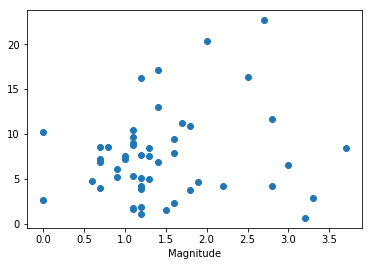

In [6]:
plt.scatter(df.loc[:50,'MAG'], df.loc[:50,'DEP'])
plt.xlabel('Magnitude');

### 3.2 Preferred pyplot/object oriented approach:

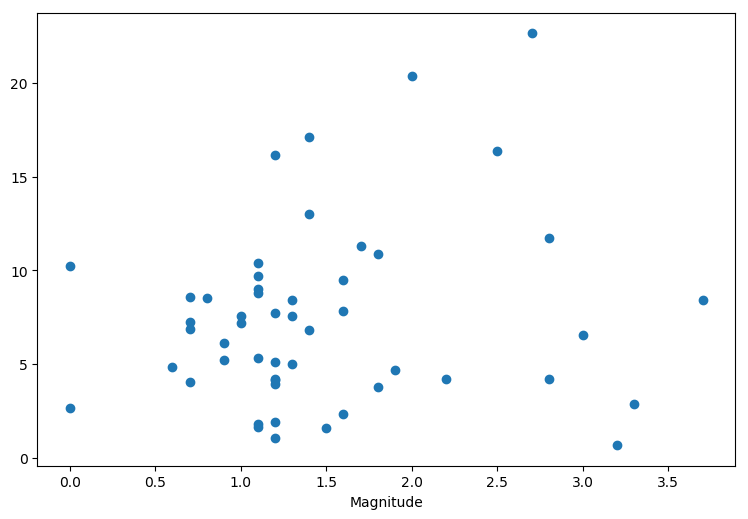

In [5]:
fig, ax = plt.subplots() # Create a named figure and axis instance
ax.scatter(df.loc[:50,'MAG'], df.loc[:50,'DEP']) # Pylab functions are implemented as axis.method() 
ax.set_xlabel('Magnitude');

### 3.3 Pandas pd.DataFrame.plot approach. 
Note that axis names are automatically added from dataframe columns.

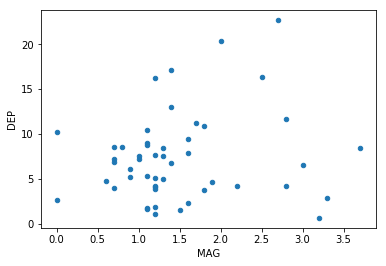

In [8]:
df[:50].plot(x='MAG', y='DEP', kind='scatter') # df.plot has a keyword called kind that controls plot type.

### 3.4 Interface Notes
* All 3 plots are similar. 

* In the pyplot example, we used `plt.subplots()` to return an axis and figure instance.  `plt.subplots()` is a convenience function that returns both figure and axes, instead of doing:
```
fig = plt.figure(figsize=(10, 3.5))
ax = plt.subplot(1,1,1) # or plt.subplot(111) is equivalent
```
* Remember, when use the pyplot interface, we get to specify an axes to plot on or change properties on using the method calls on that axis i.e (`ax.plot`, `ax.scatter`, etc.) This is really useful for making multiple plots and for incrementally adding to an existing plot.  

* For pandas:
  * Line plot is the default (see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html), but we can change that with the [`kind`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) parameter.  

* Also note that we can omit the `Text(0.5,0,'Magnitude')` type output by putting a ; at the end of the plotting line

## ---
## 4. Style Options<a id='S4'></a>
In the next 2 examples we will go over data aesthetics and axis options. The axis options are the same for any plot type but each plotting function has slightly different data aesthetic options. Luckily the [matptlotlib documentation](https://matplotlib.org/api/pyplot_summary.html#the-object-oriented-api) shows all the arguments for a given plot type. 

It can be annoying to figure out how to get everything perfect when you're learning matplotlib. Remember:
* If you don't know how to do something, you don't have to read the documentation! All you need is a rough idea of the plot anatomy you want to manipulate and google like so: `site:stackoverflow.com matplotlib "thing I can't do"`
* If you really want a label/arrow/tick mark RIGHT THERE but you have no idea how to do that in matplotlib, save the plot and add that feature in gimp/illustrator/photoshop/powerpoint instead of spending hours doing it in python

### In matplotlib we can style the plot data as well as the visible parts of the axis:
#### Data aesthetics:
* color
* size
* scatter marker
* edge color
* And more for different plot types!

#### Axis options:  
* labels
* limits
* ticks
* ticklabels
* grids
* spines

We're aiming to make something like this plot:
![colorbar](Images/colorbar.png)

### 4.1 Data Aesthetics:

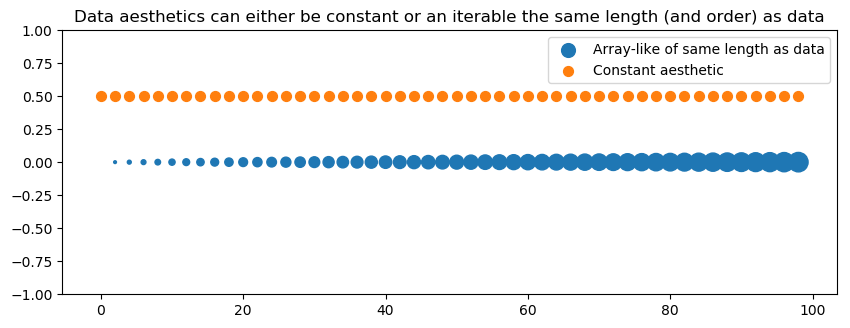

In [7]:
# Data aesthetics are passed to plotting functions for each dataset as either a constant or variable with the same length
f,ax = plt.subplots(figsize=(10, 3.5))
ax.scatter(range(0,100,2), y=[0]*50, s=range(0,200,4), label='Array-like of same length as data');
ax.scatter(range(0,100,2), y=[.5]*50, s=50, label='Constant aesthetic');
ax.set_ylim([-1,1])

# Let's also introduce legend, a function that will put a box with line/markers matching all the calls to plot with 
ax.legend()

ax.set_title('Data aesthetics can either be constant or an iterable the same length (and order) as data');

Marker sizes don't have to be a constant.  They can be a function of other variables.  
We could, for instance, make each marker size a function of the magnitude (not a great idea from a visualization perspective...but we'll do a better example next)  
We can also change the [plot marker](https://matplotlib.org/api/markers_api.html).  We can add the `marker` option to either pandas' `DataFrame.plot` or matplotlib's `scatter`.  

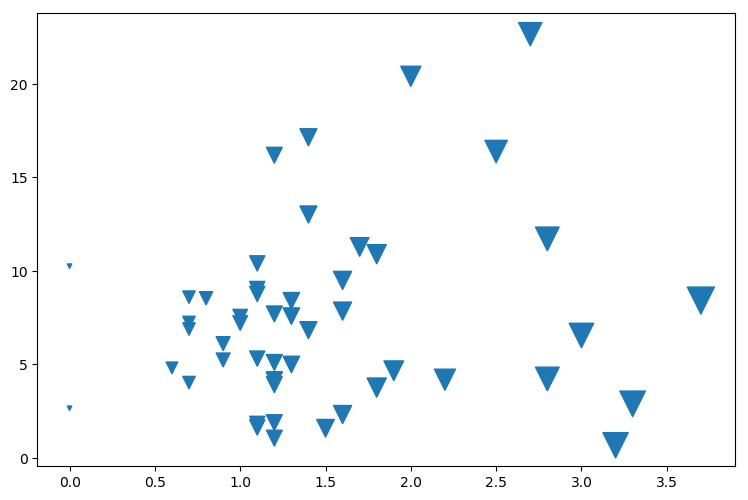

In [8]:
# matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", 
            s=[10+100*df['MAG'][:50]]);

---

### 4.2 A simple plot  with constant and variable data aesthetics

[plot.scatter documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

In [10]:
# Subset only large eathquakes:
bigones  = df[df['MAG'] >= 5]

<class 'matplotlib.axes._subplots.AxesSubplot'>


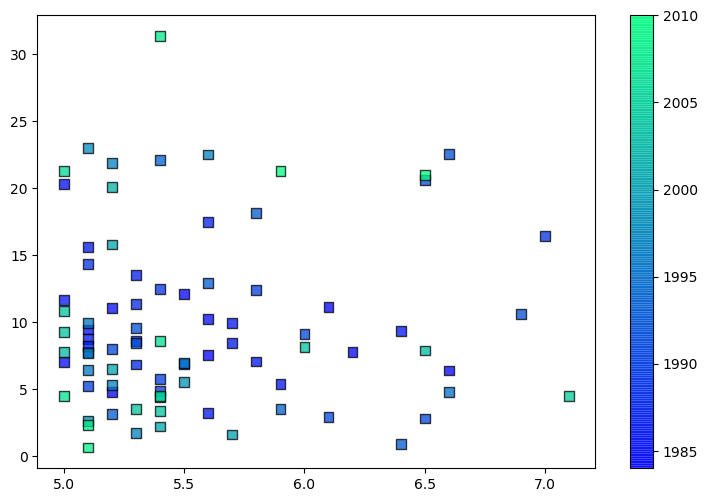

In [11]:
# matplotlib
f, ax = plt.subplots()

pts = ax.scatter(bigones['MAG'], bigones['DEP'], # data
           # s = marker size
           s=50, 
           
           # Marker = [s, ., o, *, v, ...]
           marker='s', 
                 
           # Adding an edge around the line and a bit of transparency can make it easier to distinguish overlapping   points
           edgecolors = 'k', lw = 1, alpha = .75,
           
           # c = Color
           c=bigones['YEAR'], # Here we use the year column to color the points
           cmap="winter") # color scheme: https://matplotlib.org/users/colormaps.html

# Add colormap 
clrbar = plt.colorbar(pts); # Here we pass the scatter variable as the keyword argument
print(type(clrbar.ax)) # By default, calling plt.colorbar on a collection of paths makes a new axis we can access that has the same methods as any other axis object. 


### Short Exercise On Data Aesthetics:
1. Color by a different variable instead: `EV`, which is an error estimate on depth (I think).  Copy code from above, and make the changes you need.  Also change to the plasma color scheme.
2. In the plot above: Highlight all the earthquakes in red that happened in the month you were born


---
### 4.3 Demonstrating Axis Options in Matplotlib

Matplotlib has options for all of the plot anatomy features we described before. Let's replot the last example while demonstrating what some of those are.

* Keep in mind this is an example of what's possible, not a style guide. Please do not make red cursive figure titles
* For every `ax.set_xVAR()` there's an `ax.set_yVAR()` as well
* Note that to edit the colorbar title, we call a method on the `clrbar` axis we saved. 
* Calling the ax.method() only changes that property on the current axis. We'll talk about `seaborn.set_style` and rcParams next.
* Many matplotlib functions have an optional fontdict argument. I demonstrate one use of it below but a full description is available [here](https://matplotlib.org/users/text_props.html)


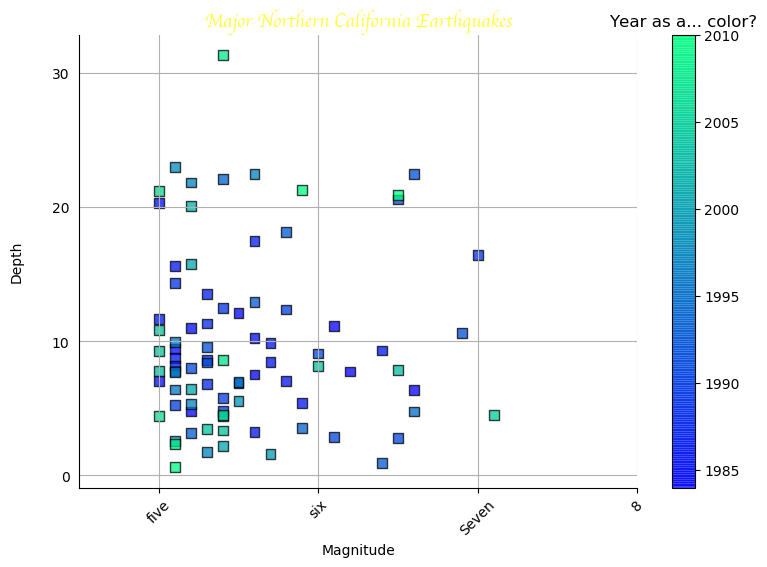

In [13]:
f, ax = plt.subplots()
colors = sns.color_palette('Set1')

pts = ax.scatter(bigones['MAG'], bigones['DEP'], # Python will ignore line breaks after a comma so I like to group my scatter, line, and color options on different lines for readability.
                 s=50, marker='s', alpha = .75,
                 edgecolors = 'k', lw = 1, 
                 c=bigones['YEAR'], cmap="winter")

# Add colormap 
clrbar = plt.colorbar(pts); # Here we pass the scatter variable as the keyword argument


#######
# Axis options: 

# Labels with some basic text options:
ax.set_xlabel('Magnitude') # Default text settings are inferred from rcParams
ax.set_ylabel('Depth', labelpad=20) # Adds space between Label and axis
ax.set_title('Major Northern California Earthquakes', 
             fontsize=13, color=colors[5],  # Change size and color
             fontdict={'family':'cursive'}) # Dictionary of font-properties like {'param':'val'} 

# Setting options on the colorbar (Note the colorbar object is NOT an axis, but it has a .ax attribute that is.)
clrbar.ax.set_title('Year as a... color?')


# Limits:
ax.set_xlim([4.5,8]) # Overrides defaults


# Spines: 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Grid
ax.grid(True)


## Ticks: (Changing frequency and location can either be done with intervals or lists.
# 1. List:
#exact_y_ticks = [0, 10, 20,30]
#ax.yaxis.set_ticks(exact_y_ticks)

# 2. Iterator
loc = matplotlib.ticker.MultipleLocator(base=10) 
ax.yaxis.set_major_locator(loc)

# 3. Changing the tick labels to strings (Useful for categorical variables)
ax.xaxis.set_ticks([5,6,7,8])
ax.set_xticklabels(['five', 'six', 'Seven', '8'], rotation=45);

# Hide left tickmarks but keep labels:
ax.tick_params(left=False);


## Short exercise Set 2. 
Use axis and data options to change the above plot to look like the plot at the beginning of section 4.   
Hint: The colormap is called 'cool'


## Exercise 2B.
Use stackoverflow to change the grid frequency and add minorticklocators in the above plot


---
## 5. Styles and Context Presets in Seaborn & Matplotlib<a id='S5'></a>

* Manually setting style options on a per axis basis is super annoying. There are several ways around this.
* Seaborn has a number of pre-built styles and contexts that can save a lot of time.
* **Context** controls readability by changing text and plot element size 
* `sns.set(context)` changes context between: **"notebook", “paper”, “talk”, and “poster”**
* **Style** controls background color, appearance of grids, ticks and spines
* `sns.set_style()` switches the axis style more quickly then manually setting evreything. Changes will apply to all plots made afterwards, although options can still be specified. Options are: **"whitegrid", "darkgrid", "white", "dark", "ticks"**
* You can change the default style of matplotlib plots.  A list of available styles:

Matplotlib has it's own styles as well based on things like *ggplot* and *538* graph settings. You can see examples at the end of this section.



### 5.1 Seaborn Contexts

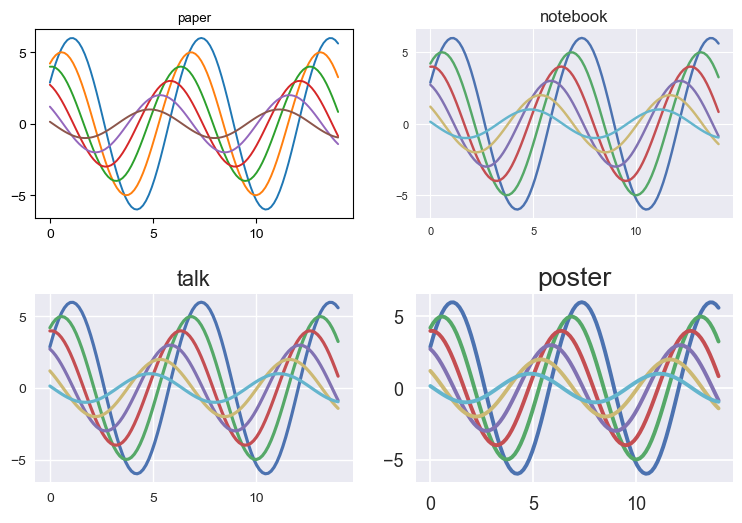

In [14]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

# Possible contexts
contexts = ['paper', 'notebook', 'talk', 'poster']

ind=1
for context in contexts: # Iterate 
    plt.subplot(2,2,ind)
    sns.set(context)
    sinplot()
    plt.gca().set_title(context)  # plt.gca() = GetCurrentAxis. 
    # You can assign the axis to a new variable or set axis options on the fly
    ind+=1

# Adjust horizontal spacing so that labels don't overlap
plt.subplots_adjust(hspace=.4)

### 5.2 Seaborn Styles

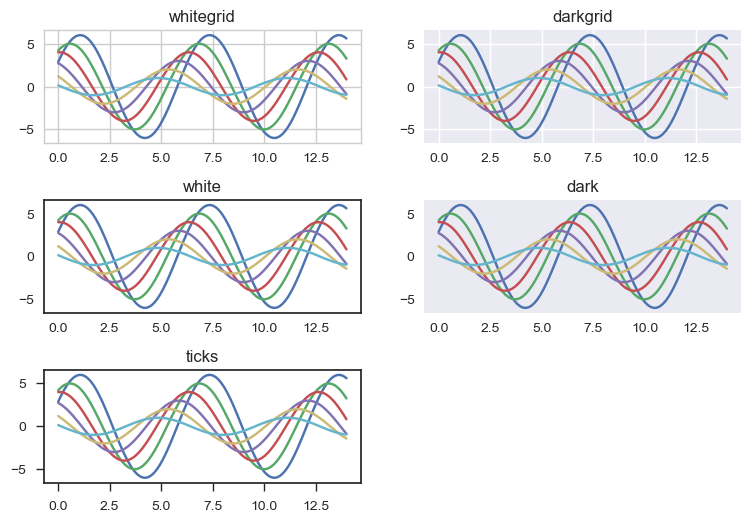

In [15]:
seaborn_styles = ["whitegrid", "darkgrid", "white", "dark", "ticks"]
sns.set('notebook')

ind=1
for style in seaborn_styles:
    sns.set_style(style)
    plt.subplot(3,2,ind)
    sinplot()
    plt.gca().set_title(style)  
    ind+=1

plt.subplots_adjust(hspace=.5)

### 5.3 Matplotlib Style sheets

* Matplotlib has its own style presets that are often combinations of seaborn styles, contexts, and colormaps without the need to import the seaborn library, or emulate other plotting styles like 538, ggplot, etc.
* You can see a gallery of what plots look like in the styles at https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
* You can also write your own styles: https://matplotlib.org/users/style_sheets.html


In [309]:
print(matplotlib.style.available)

['seaborn-dark', 'seaborn-deep', 'seaborn-muted', 'classic', 'fast', 'seaborn-white', 'Solarize_Light2', 'ggplot', 'seaborn-notebook', 'dark_background', 'seaborn-darkgrid', 'bmh', 'seaborn-ticks', 'seaborn', 'grayscale', 'seaborn-poster', 'seaborn-dark-palette', 'seaborn-talk', 'tableau-colorblind10', 'seaborn-pastel', '_classic_test', 'seaborn-colorblind', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-paper']


* To just affect a single plot without changing future plots, indent the plot call in a `with plt.style.context("style"):` block 
* Seaborn styles can be accessed analogously using `with sns.axes_style("style")`

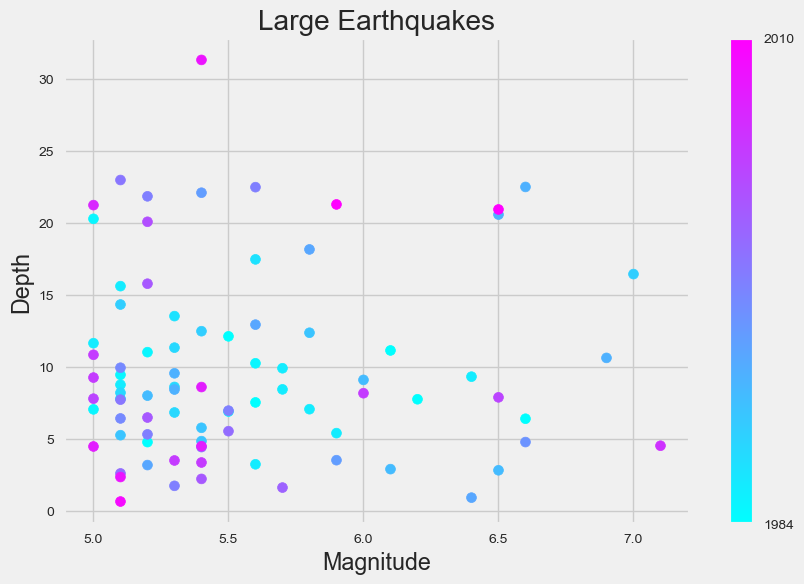

In [16]:
with plt.style.context(('fivethirtyeight')):
    pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
    plt.ylabel("Depth")
    plt.xlabel("Magnitude")
    plt.title("Large Earthquakes")
    clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
    clrbar.ax.set_yticklabels(['1984', '2010'])

---
## Introducing Other Plot Types:
We don't have to use the scatter function. These are some common plot types supported in matplotlib or seaborn and what they are good for:

### Linear relationships:
* scatter
* line  
### Categorical data:
* bar
* area
* pie (Don't use these, they are hard to read, & bar charts can be more information dense)
### Distributions:
* histogram
* kernel plots
* violin (Use these instead of histograms to get published in high impact journals)



In [9]:
# Loading some data:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


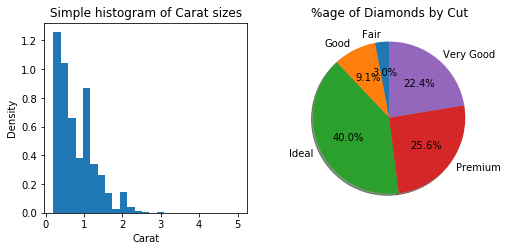

In [10]:
# Basic Plots 1
with plt.rc_context({'figure.figsize' : (8.0, 3.5)}):  # Locally set options for just one figure:

    # Make NxM array of subplots (don't worry about this for now )
    f,axs = plt.subplots(1,2)
    axs.ravel() # Flatten the array
    
    # Histogram Example:
    axs[0].hist(diamonds['carat'], bins=25, density=True)
    axs[0].set_xlabel('Carat')
    axs[0].set_ylabel('Density');
    axs[0].set_title('Simple histogram of Carat sizes')
    
    # Pie Chart Example:
    groups = diamonds.groupby('cut')
    counts = [len(x[1]) for x in groups ]
    names = [x[0] for x in groups]
    axs[1].pie(counts, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
    axs[1].set_title('%age of Diamonds by Cut')
    

C:\Users\David Delgado\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


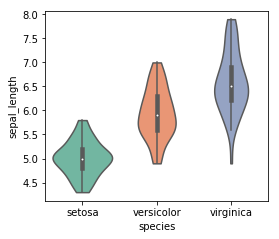

In [12]:
# Violin plots show distributions + categorical data

iris_data = sns.load_dataset('iris')
with plt.rc_context({'figure.figsize' : (4.0, 3.5)}):  # Locally set options for just one figure:
    ax = sns.violinplot(x="species", y="sepal_length", data=iris_data, palette="Set2", cut=0)

---
## 6. Subplot and Figure Options<a id='S6'></a>
We used the subplot function above, but not to create multiple plots.  Let's actually make more than one. 

The syntax we've been using to get axes is `f,ax = plt.subplots()`. In this example, we are going to add arguments to return more than 1 axis.  

We can pass (nrows, ncols, index) to `plt.subplots` to create an array of axes and access the one located at the index location.


![multiple](Images/twoplots.png)

The marker/line type specification shortcuts used below can be seen at https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

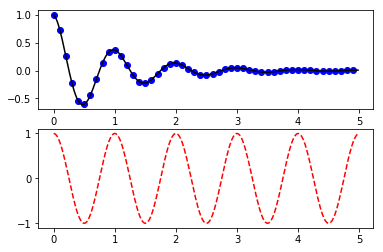

In [13]:
# function and arrays to generate some data
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# create a figure
plt.figure(1)
plt.subplot(211) # 211 = 2 rows, 1 column, first plot
plt.plot(t1, f(t1), 'bo', 
         t2, f(t2), 'k') # bo = blue, o marker

plt.subplot(212) # 212 = 2 rows, 1 column, second plot
plt.plot(t2, np.cos(2*np.pi*t2), 'r--'); # r-- = red, dashed line

---
## 7. Legends<a id='S7'></a>

* Legends can usually be handled by adding a `label = 'str'` keyword argument to a matplotib.pyplot method call and then calling `ax.legend()` afterwards. Basics:
    * `ax.legend()` looks for labeled data plotted on a given axis and adds a legend to that axis. 
    * `ax.legend()` has a `loc=` keyword that handles placement that takes 0-9 for default placements or a tuple of x,y coords
* If this is insufficient, there are methods to directly make [custom legends](https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html)
* This is often useful for multiple plots or when there are multiple data aesthetics to explain at once

* Legends are also objects and we can move them outside the axes if we want. If legends or other plot options made this way are cut off when saving, you can save the legend as a variable and manually add them when you save figures using `fig.savefig('path_to_file', bbox_extra_artists=(lgd,), bbox_inches='tight')`


In [14]:
# Quick legend example with the iris dataset:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 7.1 Basic Legend Example

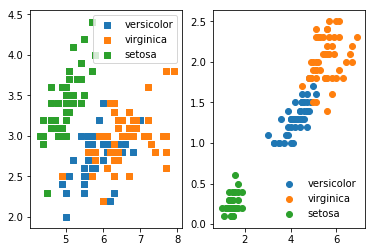

In [15]:
# Standard legend creation and placement example:
colors = sns.color_palette('Set1')
spec_list = list(set(iris_data['species']))

fig,axs = plt.subplots(1,2)
axs= axs.ravel() # Ravel flattens an array into a 1D iterable

for species in spec_list:  # Sets contain each unique value one time
    species_subset = iris_data[iris_data['species'] == species]
    axs[0].scatter(species_subset['sepal_length'], species_subset['sepal_width'], label=species, marker='s')
    axs[1].scatter(species_subset['petal_length'], species_subset['petal_width'], label=species)
    
axs[0].legend(frameon=True, loc=0) # 0 = best, MPL tries to find a place where it doesn't overlap data
axs[1].legend(frameon=False, loc=4); # 4 = lower right, can manually set to any corner or midpoint using 1-9. Turn off frame, prefered for publication

### 7.2 More legend customization 

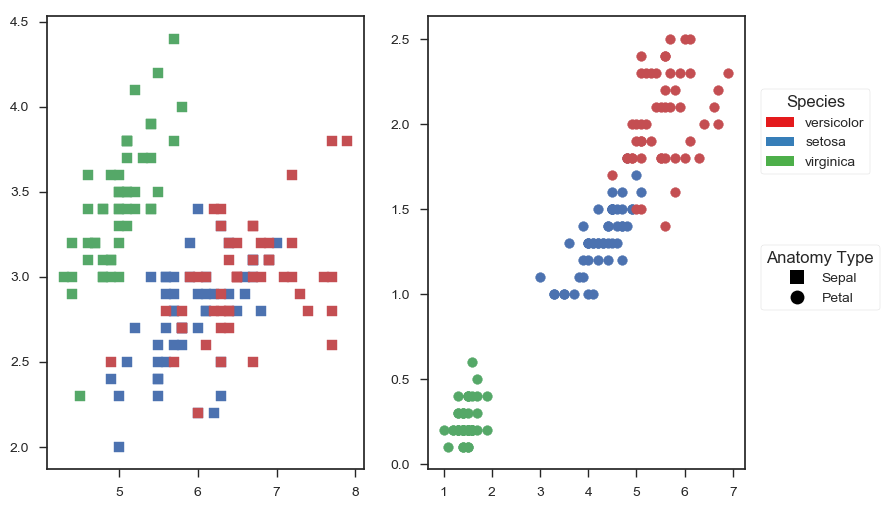

In [22]:
# A bit more customization:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig,axs = plt.subplots(1,2)
axs= axs.ravel() # Ravel flattens an array into a 1D iterable

for species in list(set(iris_data['species'])):  # Sets contain each unique value one time
    species_subset = iris_data[iris_data['species'] == species]
    axs[0].scatter(species_subset['sepal_length'], species_subset['sepal_width'], label=species, marker='s')
    axs[1].scatter(species_subset['petal_length'], species_subset['petal_width'], label=species)

    
# Here we make custom legends using 
species_legend_elements = [Patch(facecolor=colors[0], label=spec_list[0]),
                           Patch(facecolor=colors[1], label=spec_list[1]),
                           Patch(facecolor=colors[2], label=spec_list[2]),
                          ]

anatomy_legend_elements = [Line2D([0], [0], marker='s', color='w', label='Sepal',
                          markerfacecolor='k', markersize=10),
                          Line2D([0], [0], marker='o', color='w', label='Petal',
                          markerfacecolor='k', markersize=10)]

species_legend = axs[0].legend(handles=species_legend_elements, loc=(2.25,.65), title='Species', frameon=True)
anatomy_legend = axs[1].legend(handles=anatomy_legend_elements, loc=(1.05,.35), title='Anatomy Type',frameon=True)


# Saving:
fig.savefig('./legend_cut_off.png') # Will cut off objects outside the axes.
# Add extra artists explicitly when saving:
fig.savefig('./legend_example.png', bbox_extra_artists=(species_legend,anatomy_legend), bbox_inches='tight')

---
## 8. Some Matplotlib Features: Layered Plots, Annotations, MathTex<a id='S8'></a>

### 8.1 Layered plots
* In this example, we plot a histogram of some random values with `randn` as well as a theoretical fit to the data.
* `numpy.random.randn` generates normally distributed random numbers
* `scipy.stats.norm.pdf` fits normal probability distributions to data. 
* By saving bins (the output of the histogram plot) we can pass to the pdf function to estimate the true probability distribution.

![normal](Images/normal.png)

Info on named colors at https://matplotlib.org/examples/color/named_colors.html

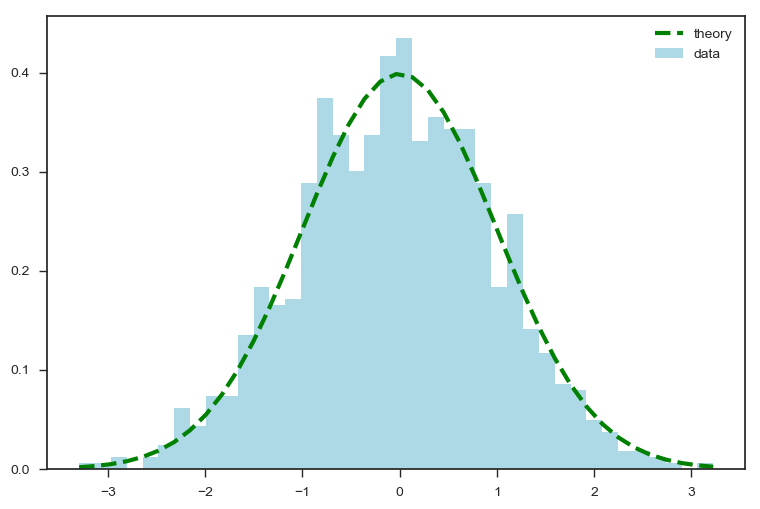

In [412]:
from scipy.stats import norm
from numpy.random import randn

# plot with matplotlib

# keep the values returned from calling the histogram plot to use with the legend and next plot
n, bins, patches = plt.hist(randn(1000), bins=40, 
                            density=True, 
                            color="lightblue")

# add another plot on top of the histogram
# save the value here too so we can use it for the legend
l, = plt.plot(bins, norm.pdf(bins, 0.0, 1.0), 
              'g--', linewidth=3)
## comma above in 'l,' means unpack the returned tuple to give you just the line object

plt.legend([l, patches[0]], ['theory', 'data']);

### 8.2 Annotating Plots
First, make the plot

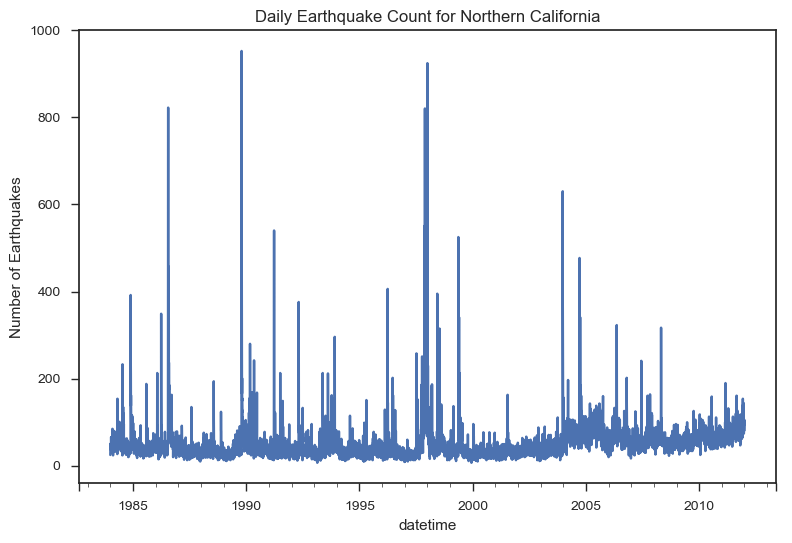

In [400]:
# pandas with matplotlib adjustments
counts = df.resample('D').count()['ID'];
counts.plot() ## plot the Series directly
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes");

#### Then annotate one of the spikes:

In [16]:
counts.plot() 
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.text(dt.datetime(1998,3,1), 925, "Big One!"); # use date as x,y position on x-axis


AttributeError: 'list' object has no attribute 'plot'

#### Or with an arrow

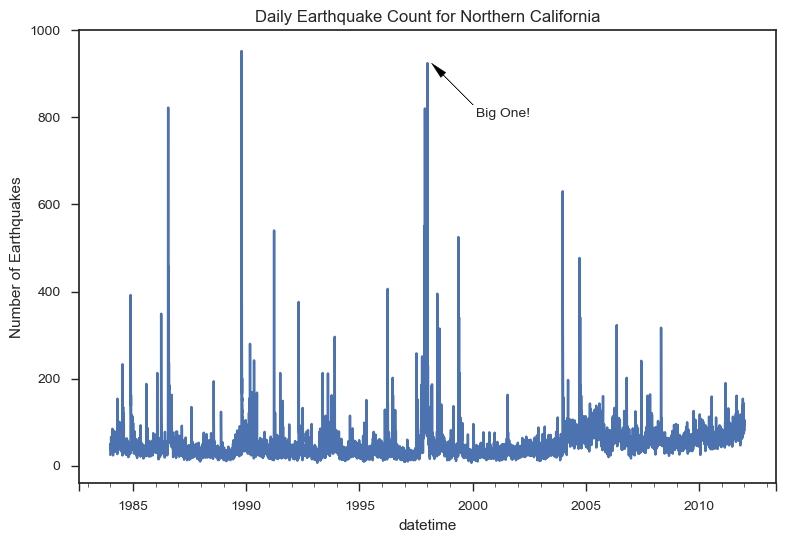

In [402]:
counts.plot() 
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.annotate("Big One!", xy=(dt.datetime(1998,3,1), 925),
             xytext=(dt.datetime(2000,3,1), 800),
             arrowprops=dict(facecolor='black', shrink=0.01, width=.1,
                             headwidth=5));

### 8.3 Mathtext and Mathematical Functions 

Let's make a plot like the following:

![mathplot](Images/mathfunction.png) 

This example intrdouces some new things, namely:
* Moving the spines to be 0 centered
* Using mathtext to make the pi symbol
* Annotating plots with lines and text

For math text used in the labels, see https://matplotlib.org/users/mathtext.html

#### We'll take it step by step:

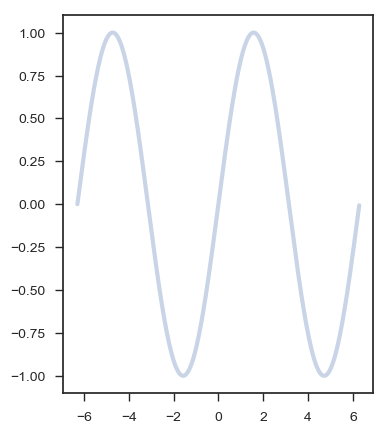

In [429]:
# generate data
sns.set_style('ticks')
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x)

# create empty plot
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
# basic plot
# plot the sin wave
ax.plot(x, y,
        linewidth=3, # line thickness
        alpha=0.3); # line opacity -- just setting so we can see the labels and exis through it

#### Adjust spines to look like a mathemetical graph: 

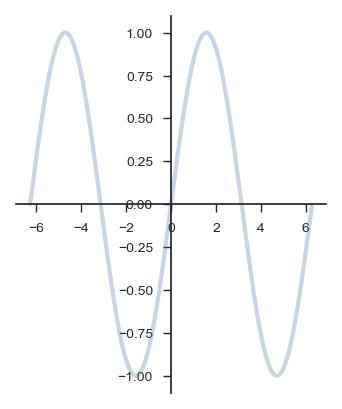

In [431]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);

# deal with bounding box 
# lose top and right
# move bottom and left to the center like a mathematical graph
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


#### Annotate with reference lines:

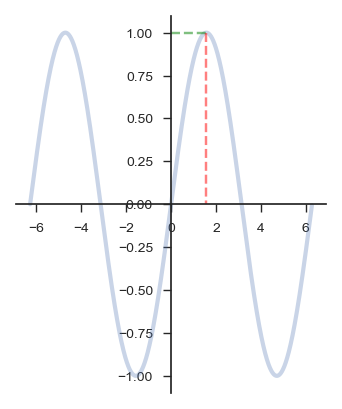

In [434]:
# plot the reference lines
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.plot([0, np.pi/2], [1, 1], ls="--", 
        color="green", alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], 
        ls="--", color="red", alpha=0.5);


#### Add mathtext: 
(See above for link to documentation, but a lot of common math notation like subscripts, superscripts, integrals, etc. are available)

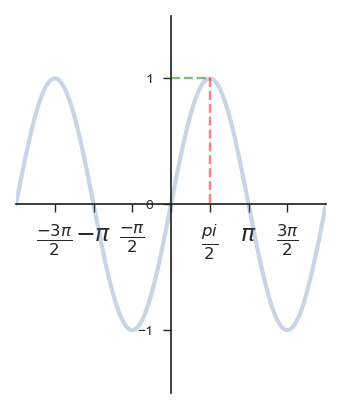

In [435]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot([0, np.pi/2], [1, 1], ls="--", 
        color="green", alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], 
        ls="--", color="red", alpha=0.5);

# axis limits
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# axis labels
xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",
           r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",
           r"${\pi}$",r"$\frac{3\pi}{2}$"]

ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)

yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker);


#### Text annotation:

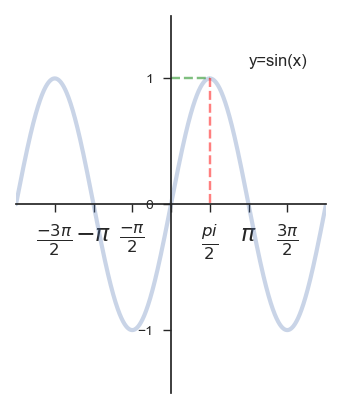

In [436]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot([0, np.pi/2], [1, 1], ls="--", 
        color="green", alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], 
        ls="--", color="red", alpha=0.5);
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)
xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",
           r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",
           r"${\pi}$",r"$\frac{3\pi}{2}$"]
ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)
yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker);

# annotation of function line
ax.text(np.pi, 1.1, "y=sin(x)");

---
## 9. Working with Dates, Aggregating, & Other Nifty Pandas Tricks<a id='S9'></a>
Matplotlib can understand dates as a datatype and automatically adjust the axis labels to handle dates.  
For this example, we will use the groupby feature of pandas to group observations by a daterange.
Key points:
* **groupby** groups dataframe observations by the values in a particular column and returns an iterable of tuples composed of the groupname and a dataframe for each group.


* **datetime** objects and indices can be parsed using date ranges and **resampled** by pandas into day, month, or year ranges.
* The datetime object represented by the string '2018-06-12 15:07:01' has the format '%Y-%m-%d %H-%M:%S'
* You can convert from strings to datetimes and vice versa using `datetime.datetime.strptime(string, format)` and `datetime.datetime.strftime(datetime, format)`


* When plotting data with date as the x-axis, use `ax.xaxis_date()` to automatically label the axis correctly
* We can alter the text style of a date axis using the `ax.xaxis.set_major_formatter(dates.DateFormatter('%format'))` syntax.


### Monthly Earthquake Counts
We will make the below plot of monthly earthquake counts for the last 4 years of the data.

![monthly](Images/monthly_earthquake.png)

Make a proper date column (instead of the current multiple columns for each part of the date) in the data frame so that we can plot by date.  Setting the new date column as an index lets us group by month easily.

In [512]:
df['datetime'] = pd.to_datetime(df[df.columns[range(6)]]) ## first 6 columns are year, month, day, hour, min, sec
df = df.set_index("datetime")

In [465]:
df.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,DEP,EH1,EH2,AZ,EV,MAG,ID,north
datetime,,,,,,,,,,,,,,,,
1984-01-01 01:19:11.317,1984,1,1,1,19,11.317,36.08781,-120.22869,10.897,0.020,0.010,96.0,0.022,1.8,1109386,False
1984-01-01 01:58:02.420,1984,1,1,1,58,2.420,36.87608,-120.90669,2.661,0.071,0.018,55.0,0.421,0.0,346,False
1984-01-01 01:59:27.124,1984,1,1,1,59,27.124,36.87000,-120.90889,1.592,0.110,0.016,66.0,0.727,1.5,1109389,False
1984-01-01 02:28:04.240,1984,1,1,2,28,4.240,37.51546,-118.75485,7.703,0.020,0.008,37.0,0.024,1.2,1109391,False
1984-01-01 03:08:58.044,1984,1,1,3,8,58.044,40.57227,-124.55933,20.407,1.009,0.083,103.0,0.080,2.0,1109392,True


If you don't have data in this format, you can use the [strptime](http://strftime.org/) function in the datetime module:

In [23]:
?dt.datetime.strptime()

In [464]:
date_from_string = dt.datetime.strptime('2000-01-01', '%Y-%m-%d' )
print(date_from_string)
print(df.index[0])

2000-01-01 00:00:00
1984-01-01 01:19:11.317000


Plot number of earthquakes by month with a bar chart, limit to recent years (the last 48 observations are the last 4 years (4 years * 12 months).  We need to use a grouper to tell pandas how to group the data by month.

In [514]:
df.groupby(pd.Grouper(freq='M')).count().head()


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,DEP,EH1,EH2,AZ,EV,MAG,ID
datetime,,,,,,,,,,,,,,,
1984-01-31,1427,1427,1427,1427,1427,1427,1427,1427,1427,1396,1396,1396,1396,1427,1427
1984-02-29,1431,1431,1431,1431,1431,1431,1431,1431,1431,1399,1399,1399,1399,1431,1431
1984-03-31,1624,1624,1624,1624,1624,1624,1624,1624,1624,1597,1597,1597,1597,1624,1624
1984-04-30,1962,1962,1962,1962,1962,1962,1962,1962,1962,1942,1942,1942,1942,1962,1962
1984-05-31,2041,2041,2041,2041,2041,2041,2041,2041,2041,2007,2007,2007,2007,2041,2041


In [470]:
counts = df.groupby(pd.Grouper(freq='M')).count()['ID'][-48:] # do the aggregation
counts.head()

datetime
2008-01-31    1844
2008-02-29    1881
2008-03-31    2115
2008-04-30    2730
2008-05-31    2034
Freq: M, Name: ID, dtype: int64

If we tried to just use the month variable, we'd end up with aggregates across month numbers:

In [471]:
df.groupby(df.MONTH).count()['ID'][-48:]

MONTH
1     40840
2     33769
3     42063
4     41818
5     43717
6     40274
7     47537
8     44285
9     41316
10    45632
11    46809
12    45414
Name: ID, dtype: int64

Another way to get the counts is to use `resample()` instead of a grouper
This is the most intuitive way to do it IMO if you have a datetime index already but as you can see, there are many options:

In [490]:
df.loc['2008-01-01':'2012-01-01'].resample('M').count()['ID'].head()

datetime
2008-01-31    1844
2008-02-29    1881
2008-03-31    2115
2008-04-30    2730
2008-05-31    2034
Freq: M, Name: ID, dtype: int64

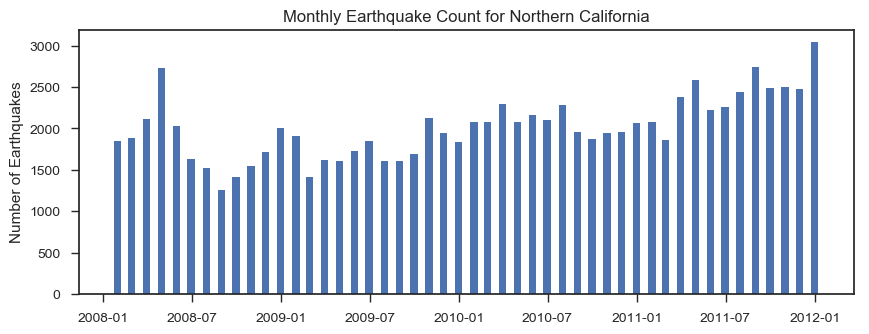

In [481]:
# matplotlib
fig, ax = plt.subplots(figsize=(10, 3.5)) # specify a plot size, use subplots to get axes because we'll need it later
ax.bar(counts.index, counts, width=15) # if we don't set the bar width, some bars might not be visible with this many
ax.xaxis_date()
plt.title("Monthly Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes");

### 9.2 Hourly Counts on a Busy Day

Let's plot hourly earthquakes on a busy day, October 18, 1989 using the same approach of:

1. resample the datetime index
2. bar plot 

![hourly](Images/hourly_earthquakes.png)

In [487]:
counts_hourly = df.loc['1989-10-18'].groupby(pd.Grouper(freq='H')).count()['ID']

#Another way to do the above:
df.loc['1989-10-18'].resample('1H').count()['ID'];

counts_hourly.head() 

datetime
1989-10-18 00:00:00    64
1989-10-18 01:00:00    90
1989-10-18 02:00:00    86
1989-10-18 03:00:00    59
1989-10-18 04:00:00    60
Freq: H, Name: ID, dtype: int64

We can plot using the new resampled index and the hourly counts.  

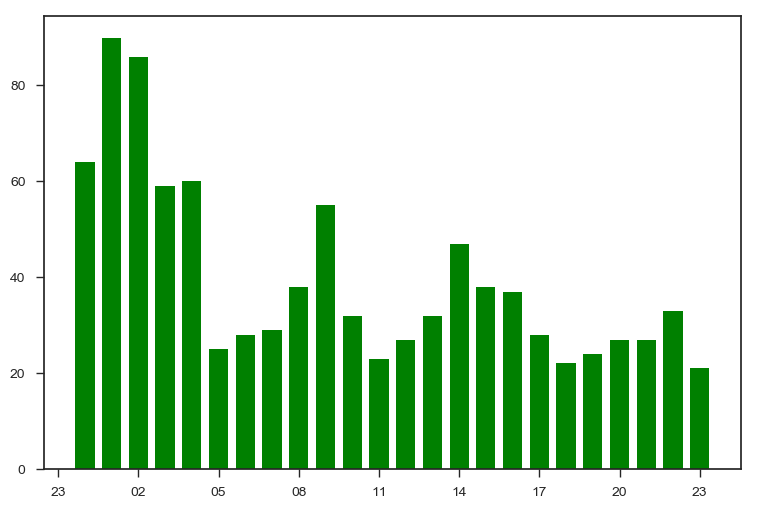

In [488]:
#matplotlib

fig,ax = plt.subplots()

plt.bar(counts_hourly.index, 
        counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H'));

Looks OK, but we can make it nicer.  Also let's export the plot as pdf (type is determined by file name extension).  With `%matplotlib inline` turned on, the save statement needs to be in the same cell of the notebook with the plot creation to work.

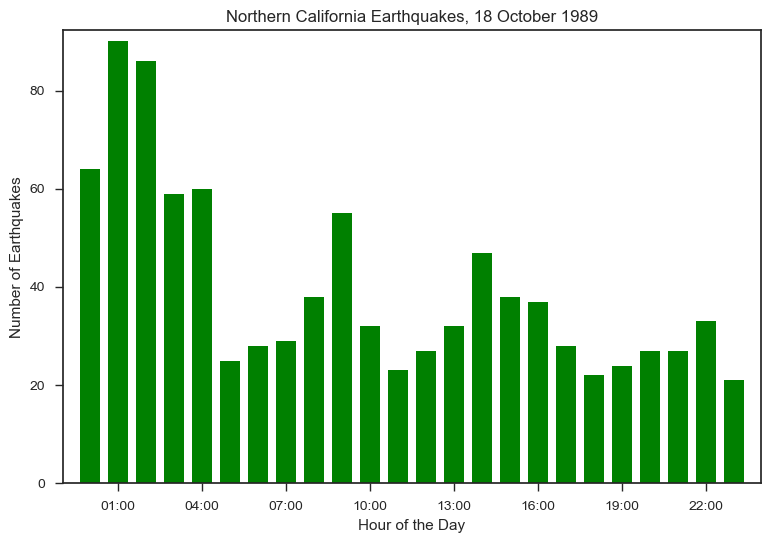

In [489]:
#matplotlib
fig, ax = plt.subplots() ## in one line instead of two above, just to show this
plt.bar(counts_hourly.index, counts_hourly, width=.03, 
        color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:00'))
#plt.ylim(0, 95) ## could modify ylim manually, but below works even if data changes
ax.margins(0.025) ## control extra space at beginning and end of x-axis
plt.title("Northern California Earthquakes, 18 October 1989")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes");
plt.savefig("plot1.pdf") # save the plot too

## Exercise 3.
Plot earthquake variability across some category (year, month, time of day, or spatial range)

---
## 10. Statistical visualization with [Seaborn](https://seaborn.pydata.org)<a id='S10'></a>

[Seaborn](https://seaborn.pydata.org) is one option for moving beyond the basic plots.  It's focus is statistical visualization.


### 10.1 Density/Bivariate Distribution Plots
When we have a lot of data, scatter plots can get difficult to read.  Let's do a density plot instead to explore a bivariate distribution.  Seaborn has several options, both for the density plot and supplementary plots along the axes.  http://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions

/Users/jimbo/anaconda3/envs/skbio_py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


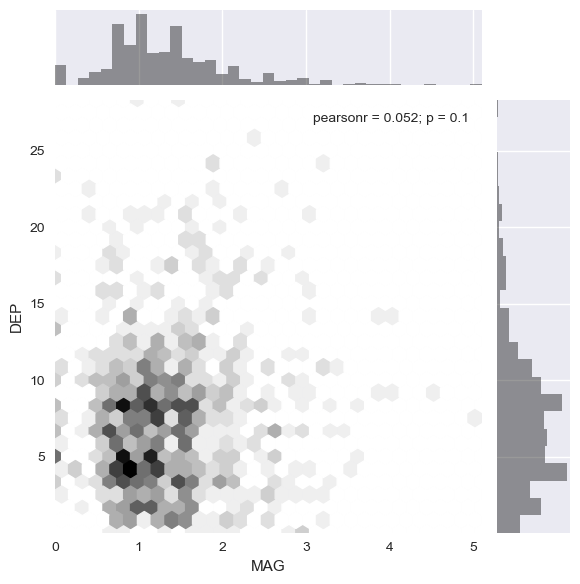

In [421]:
sns.set() # use Seaborn default styling
sns.jointplot(x=df['MAG'][:1000], 
              y=df['DEP'][:1000], 
              kind="hex", 
              color="k"); # color k is black

`jointplot` takes care of the overall plot.  If you want more control over the core and axes plots, you can add a density plot and axes plots to an existing matplotlib figure.

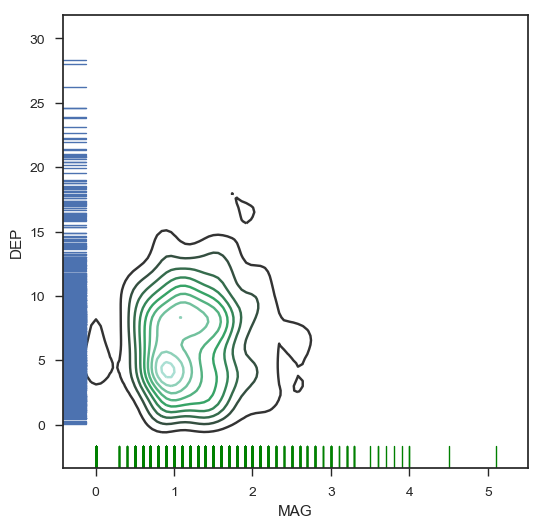

In [420]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df['MAG'][:1000], df['DEP'][:1000], ax=ax)
sns.rugplot(df['MAG'][:1000], color="g", ax=ax)
sns.rugplot(df['DEP'][:1000], vertical=True, ax=ax);

### 10.2 Regression and Trend Lines
Seaborn has many functions for visualizing linear relationships and even interaction effect between (or conditional effects of) variables: http://seaborn.pydata.org/tutorial/regression.html

First, a standard regression plot

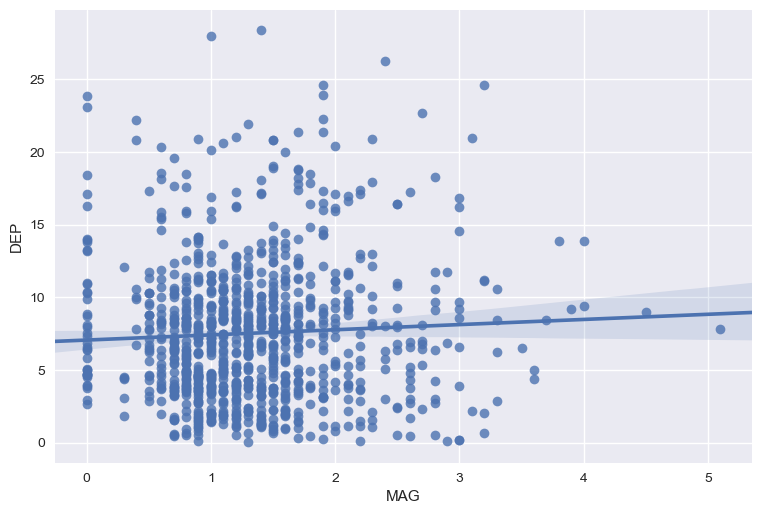

In [422]:
sns.regplot(x="MAG", y="DEP", data=df[:1000]);

In [ ]:
This includes a 95% confidence interval on the slope coefficient in the plot by default (you can turn it off with the `ci` parameter).  We can also plot the residuals (errors) from a regression to check fit and adherence to model assumptions:  

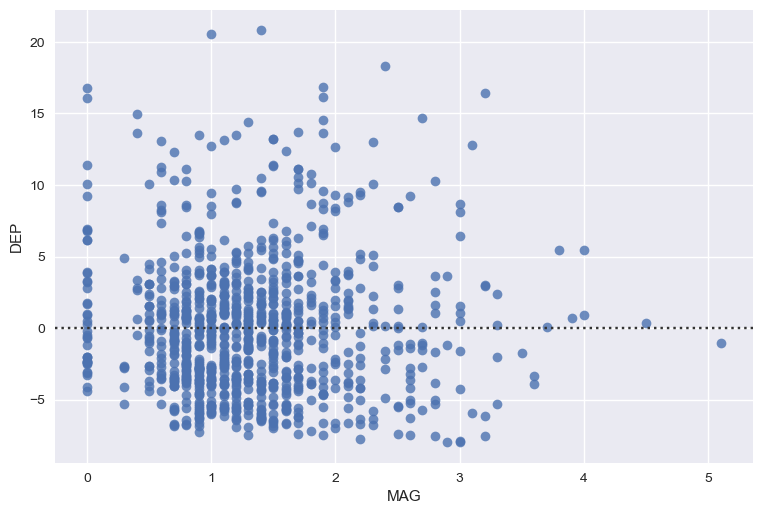

In [423]:
sns.residplot("MAG","DEP", df[:1000]);

There are further options for variations like polynomial fits, logistic regression, loess smoothing, and robust regression (eliminates/down-weights outliers).

In addition to `regplot`, there's also the slightly more powerful `lmplot` that let's us condition the slope and intercept on a third variable.

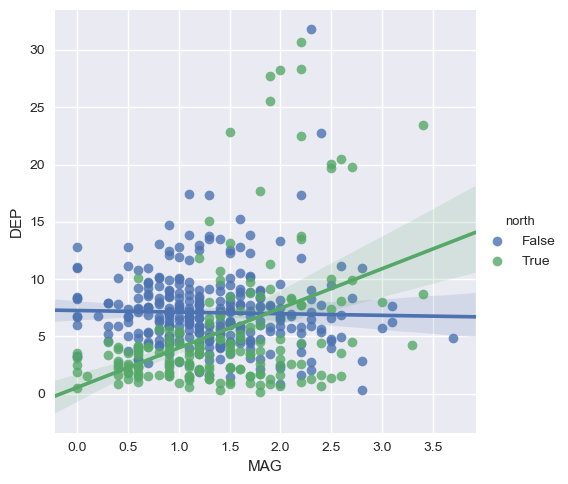

In [424]:
df['north'] = df['LAT'] > 38 # create a new variable to divide earthquakes by latitude
sns.lmplot(x="MAG", y="DEP", hue="north", data=df.sample(500));

---
## 11. Image Data and 3D Surfaces<a id='S11'></a>  Look into SEM images here

Plot a MRI image, change the [color map](https://matplotlib.org/examples/color/colormaps_reference.html); [source](https://matplotlib.org/examples/pylab_examples/mri_demo.html)  
[Link to image data](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/sample_data/s1045.ima.gz) if your cbook.get_sample_data path is broken like mine.

[Colormap creation tool](http://jdherman.github.io/colormap/)

* Images are just arrays of pixel values
* `ax.imshow(array)` will display an array as an image.
* The **scikit-image** package has a lot of functionality for edge detection, thresholding, segmenting images but for this class we will just show you how to display images.
* You can add annotations and colormaps to axes with imshow on them just like with other plot types

In [4]:
import matplotlib.cbook as cbook # for the data
import matplotlib.cm as cm # for color map

In [5]:
# Might be necessary if the cookbook symlink is broken. /shrug_emoji
import os
home = os.path.expanduser('~')
dfile = cbook.get_sample_data(home+'/Downloads/s1045.ima.gz')

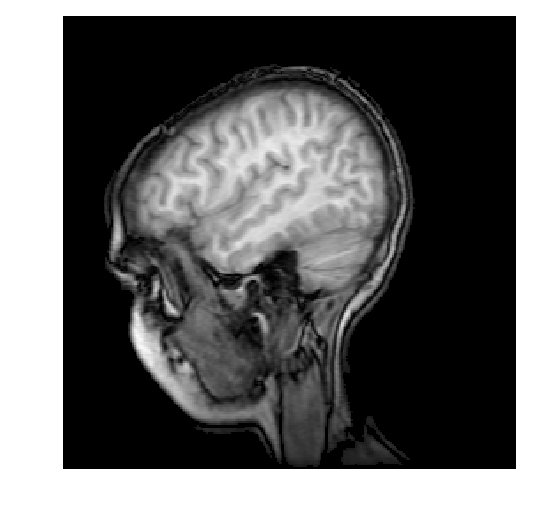

In [527]:
fig, ax = plt.subplots(num="MRI_demo")

# Data are 256x256 16 bit integers
#dfile = cbook.get_sample_data('s1045.ima.gz')
im = np.fromstring(dfile.read(), np.uint16).astype(float)
im.shape = (256, 256)
dfile.close()

ax.imshow(im, cmap=cm.gray)
ax.axis('off');

(-0.5, 255.5, 255.5, -0.5)

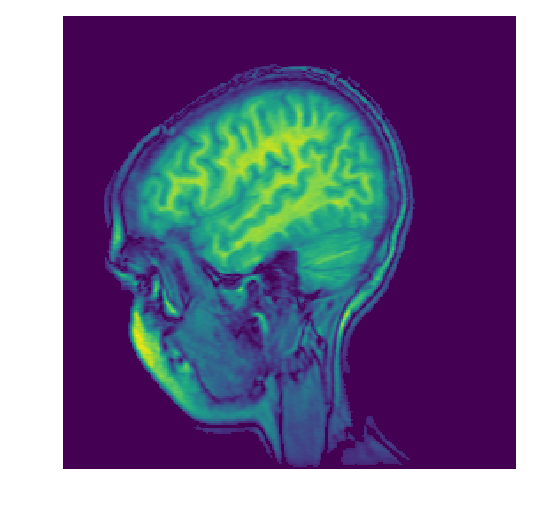

In [528]:
fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cm.viridis)
ax.axis('off')

In [118]:
c = np.matrix('0,0,0; 0,0,0; 0,1,1; 0,1,1; 0,1,1; 0,1,2; 0,2,2; 0,2,2; 0,2,3; 0,2,3; 0,3,3; 0,3,4; 0,3,4; 0,3,4; 0,4,5; 0,4,5; 0,4,5; 0,4,6; 0,5,6; 0,5,6; 0,5,7; 0,5,7; 0,6,7; 0,6,8; 0,6,8; 0,6,8; 0,7,9; 0,7,9; 0,7,10; 0,7,10; 0,8,10; 0,8,11; 0,8,11; 0,8,11; 0,9,12; 0,9,12; 0,9,12; 0,9,13; 0,10,13; 0,10,13; 0,10,14; 0,10,14; 0,11,14; 0,11,15; 0,11,15; 0,11,15; 0,12,16; 0,12,16; 0,12,16; 0,12,17; 0,13,17; 0,13,17; 0,13,18; 0,13,18; 0,14,18; 0,14,19; 0,14,19; 0,15,19; 0,15,20; 0,15,20; 0,15,20; 0,16,21; 0,16,21; 0,16,21; 0,16,22; 1,17,23; 1,18,24; 1,19,25; 2,20,26; 2,21,27; 3,22,28; 3,23,29; 4,23,30; 4,24,31; 4,25,32; 5,26,33; 5,27,34; 6,28,35; 6,29,36; 6,30,37; 7,30,38; 7,31,39; 8,32,40; 8,33,41; 9,34,42; 9,35,44; 9,36,45; 10,37,46; 10,37,47; 11,38,48; 11,39,49; 12,40,50; 12,41,51; 12,42,52; 13,43,53; 13,44,54; 14,44,55; 14,45,56; 15,46,57; 15,47,58; 15,48,59; 16,49,60; 16,50,61; 17,50,62; 17,51,63; 17,52,64; 18,53,65; 18,54,66; 19,55,67; 19,56,68; 20,57,69; 20,57,70; 20,58,71; 21,59,72; 21,60,73; 22,61,74; 22,62,75; 23,63,77; 23,64,78; 23,64,79; 24,65,80; 24,66,81; 25,67,82; 25,68,83; 26,69,84; 26,70,85; 26,71,86; 27,71,87; 28,72,88; 29,74,89; 31,75,90; 32,76,91; 34,77,92; 35,78,93; 37,80,93; 38,81,94; 40,82,95; 41,83,96; 43,84,97; 44,86,98; 46,87,99; 48,88,100; 49,89,101; 51,90,102; 52,91,103; 54,93,104; 55,94,105; 57,95,106; 58,96,107; 60,97,108; 61,99,109; 63,100,110; 64,101,110; 66,102,111; 67,103,112; 69,105,113; 70,106,114; 72,107,115; 73,108,116; 75,109,117; 76,110,118; 78,112,119; 79,113,120; 81,114,121; 82,115,122; 84,116,123; 85,118,124; 87,119,125; 88,120,126; 90,121,127; 91,122,128; 93,124,128; 94,125,129; 96,126,130; 98,127,131; 99,128,132; 101,129,133; 102,131,134; 104,132,135; 105,133,136; 107,134,137; 108,135,138; 110,137,139; 111,138,140; 113,139,141; 114,140,142; 116,141,143; 117,143,144; 119,144,145; 120,145,145; 122,146,146; 123,147,147; 125,149,148; 127,151,148; 129,152,148; 131,154,149; 133,156,149; 135,157,149; 138,159,149; 140,161,150; 142,162,150; 144,164,150; 146,166,150; 148,167,151; 150,169,151; 152,171,151; 154,172,151; 156,174,152; 158,176,152; 160,177,152; 162,179,152; 164,181,153; 166,183,153; 168,184,153; 171,186,153; 173,188,154; 175,189,154; 177,191,154; 179,193,154; 181,194,155; 183,196,155; 185,198,155; 187,199,155; 189,201,156; 191,203,156; 193,204,156; 195,206,156; 197,208,157; 199,210,157; 201,211,157; 203,213,157; 206,215,158; 208,216,158; 210,218,158; 212,220,158; 214,221,159; 216,223,159; 218,225,159; 220,226,159; 222,228,160; 224,230,160; 226,231,160; 228,233,161; 230,235,161; 232,236,161; 234,238,161; 236,240,162; 239,242,162; 241,243,162; 243,245,162; 245,247,163; 247,248,163; 249,250,163; 251,252,163; 253,253,164; 255,255,164')
cmp = matplotlib.colors.ListedColormap(c/255.0)

(-0.5, 255.5, 255.5, -0.5)

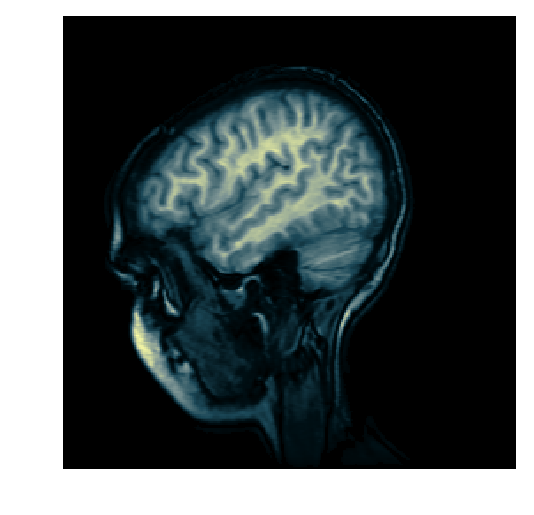

In [530]:
fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cmp)
ax.axis('off')

## 3D Surfaces

[mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/index.html) if for 3D plotting.  [Example source](https://matplotlib.org/examples/mplot3d/custom_shaded_3d_surface.html)  
[Link to image data](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/sample_data/jacksboro_fault_dem.npz)


In [18]:
# Potentially required fix. If the cell below fails, download the data from the link above and then save the path like this:
import os
home = os.path.expanduser('~')
filename = home+'/Downloads/jacksboro_fault_dem.npz'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', 
                                 asfileobj=False) #data
with np.load(filename) as dem:
    
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

print(x.shape)

<IPython.core.display.Javascript object>


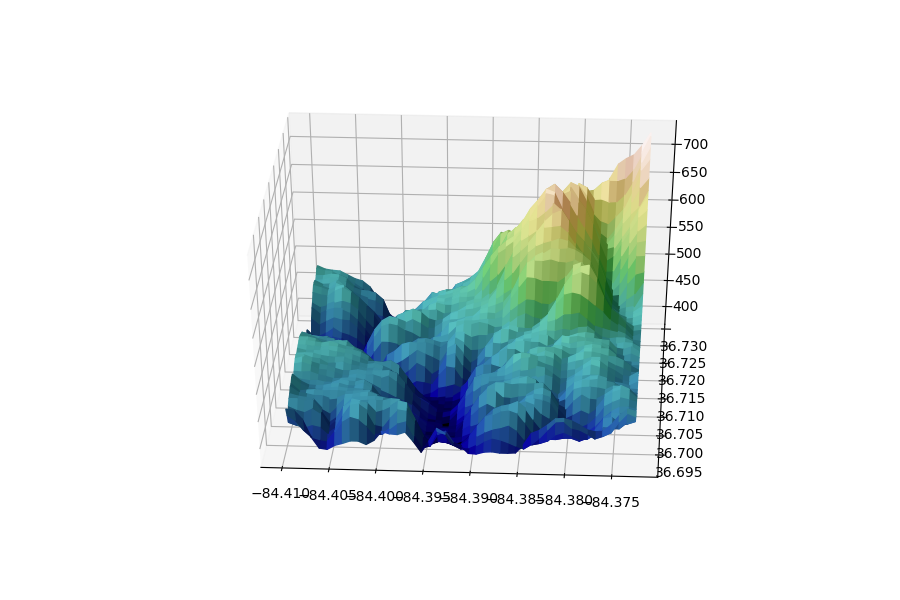

In [9]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft') # make colors
surf = ax.plot_surface(x, y, z, # 2D arrays of data
                       rstride=1, # row step
                       cstride=1, # column step
                       facecolors=rgb, #the shade from above
                       shade=False) # because we already computed what we wanted

---
## Interactive Plots
Above we turned on the interactive plots in the notebook.  Let's turn them back on to see what they do.

<IPython.core.display.Javascript object>


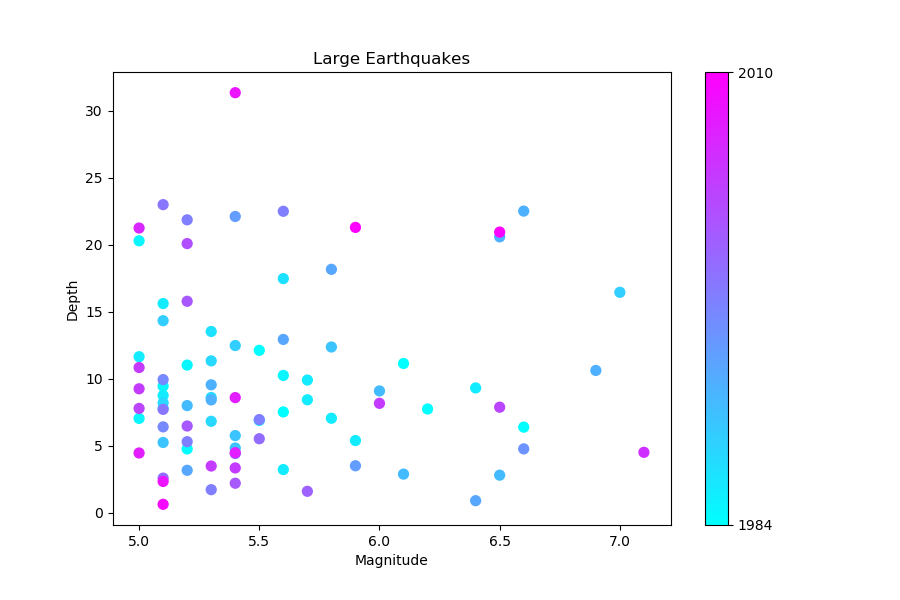

In [17]:
%matplotlib notebook
plt.figure()
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
        s=50, # marker size
        cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
        c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title("Large Earthquakes")
clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
clrbar.ax.set_yticklabels(['1984', '2010']);


#### And now turn it back off:

In [16]:
%matplotlib inline

---
## 12. Paletteable<a id='S12'></a>
* This library features all of the default matplotlib and seaborn palettes along with some other unique palettes
* You can use it to create continous colormaps as well as discrete colormaps.
* Also keep in mind whether you want your colormap to show categorical data, sequentially increasing data, or diverging data (extrema are more pronounced) and pick the appropriate colormap
* Read the docs [here](https://jiffyclub.github.io/palettable/)  
#### A quick example using a Wes Anderson color palette:

In [ ]:
# May be necessary if you don't have this installed. 
!pip3 install palettable  # If this doesn't work: open a terminal, and run: conda install palettable

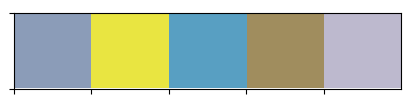

In [119]:
# Use .mpl_colors for discrete colors and .mpl_colormap for continuous ranges.
import palettable
WA_colors = palettable.wesanderson.Aquatic2_5.mpl_colors # All the palettes are accessed via cat.palette
sns.palplot(WA_colors)

---
## 13. Documentation and Resources<a id='S13'></a>

### Matplotlib

* [Matplotlib Beginnner Tips](http://matplotlib.org/users/beginner.html)
* [Pyplot Module Summary](http://matplotlib.org/api/pyplot_summary.html)
* [MPL Gallery](http://matplotlib.org/gallery.html)

### Other packages in this class
* [Seaborn Docs](https://seaborn.pydata.org/)
* [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
* [Palettable](https://jiffyclub.github.io/palettable/)
